In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pycountry_convert as pc
import pycountry as pyc
from fuzzywuzzy import fuzz

K:\Anaconda\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
main_df = pd.read_csv('.//Output//Main_df.csv',index_col = 0)

In [3]:
print(len(main_df))
print(len(main_df['City_x'].unique()))

824
263


It looks like there are a bunch of duplicate entries, so lets get rid of those.

In [4]:
main_df.drop_duplicates(subset = ['City_x', 'Country Code','State'], inplace = True)
main_df.reset_index(drop = True,inplace = True)

It looks like many cities did not have a population growth listed

In [5]:
main_df.drop(index = main_df[main_df['avg_5_yr_growth_thou'].isna()].index,inplace = True)
main_df.reset_index(drop = True,inplace = True)

<h1>Quick Data Overview </h1>

In [6]:
main_df.columns

Index(['City_x', 'State', 'Quality of Life Index', 'Purchasing Power Index',
       'Safety Index', 'Health Care Index', 'Cost of Living Index',
       'Property Price to Income Ratio', 'Traffic Commute Time Index',
       'Pollution Index', 'Country Code', 'pop_thou', 'avg_5_yr_growth_thou',
       'Percent Fertile', 'chrstpct', 'judpct', 'islmpct', 'budpct', 'zorpct',
       'hinpct', 'sikhpct', 'shntpct', 'bahpct', 'taopct', 'jainpct', 'conpct',
       'synpct', 'anmpct', 'nonpct', 'othrpct', 'sumpct', 'Country', 'City_y',
       'AvgTemperature', 'pct_lt_sec', 'pct_some_sec', 'pct_some_ter'],
      dtype='object')

In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City_x                          144 non-null    object 
 1   State                           144 non-null    object 
 2   Quality of Life Index           144 non-null    float64
 3   Purchasing Power Index          144 non-null    float64
 4   Safety Index                    144 non-null    float64
 5   Health Care Index               144 non-null    float64
 6   Cost of Living Index            144 non-null    float64
 7   Property Price to Income Ratio  144 non-null    float64
 8   Traffic Commute Time Index      144 non-null    float64
 9   Pollution Index                 144 non-null    float64
 10  Country Code                    141 non-null    object 
 11  pop_thou                        144 non-null    float64
 12  avg_5_yr_growth_thou            144 

In [8]:
main_df.describe()

Quality of Life Index  Purchasing Power Index  Safety Index  \
count             144.000000              144.000000    144.000000   
mean              130.574143               69.729772     57.695566   
std                42.609036               29.025700     15.365758   
min               -23.305000               12.395000     18.422778   
25%               102.407833               45.121458     47.764681   
50%               136.390000               65.920000     60.094661   
75%               165.524687               93.666250     69.046429   
max               226.207059              139.640556     92.580000   

       Health Care Index  Cost of Living Index  \
count         144.000000            144.000000   
mean           66.434395             56.470917   
std            10.289754             21.979924   
min            31.187500             20.365000   
25%            59.682813             38.937232   
50%            67.930273             52.290417   
75%            73.820000             74.276964   
max            85.710000            139.673889   

       Property Price to Income Ratio  Traffic Commute Time Index  \
count                      144.000000                  144.000000   
mean                        12.310968                   38.123149   
std                          7.100003                    9.444614   
min                          2.317857                   20.392941   
25%                          7.785036                   31.273154   
50%                         10.566250                   36.866051   
75%                         14.612917                   42.668409   
max                         45.253333                   69.146667   

       Pollution Index      pop_thou  avg_5_yr_growth_thou  ...     conpct  \
count       144.000000    144.000000            144.000000  ...  81.000000   
mean         52.988223   4336.798611            385.944444  ...   0.000025   
std          21.913319   5923.563281            690.950564  ...   0.000104   
min          12.471765    321.000000            -47.000000  ...   0.000000   
25%          36.136944    761.250000             19.500000  ...   0.000000   
50%          53.101909   1725.000000            101.500000  ...   0.000000   
75%          70.782926   4929.000000            395.500000  ...   0.000000   
max          95.764286  37719.000000           3796.000000  ...   0.000900   

          synpct     anmpct     nonpct    othrpct  sumpct  AvgTemperature  \
count  81.000000  81.000000  81.000000  81.000000    81.0      131.000000   
mean    0.021110   0.006211   0.107095   0.011681     0.0       52.016641   
std     0.091494   0.012706   0.113420   0.019657     0.0       25.186626   
min     0.000000   0.000000   0.000000   0.000000     0.0      -46.868050   
25%     0.000000   0.000000   0.015000   0.001000     0.0       45.203346   
50%     0.000100   0.001700   0.085000   0.004100     0.0       52.364505   
75%     0.000300   0.002400   0.164300   0.008800     0.0       67.352969   
max     0.420000   0.071200   0.690300   0.067300     0.0       82.192499   

       pct_lt_sec  pct_some_sec  pct_some_ter  
count  140.000000    140.000000    140.000000  
mean     0.145857      0.389036      0.229786  
std      0.115297      0.121559      0.138992  
min      0.000000      0.175000      0.035000  
25%      0.040000      0.305000      0.105000  
50%      0.112500      0.380000      0.210000  
75%      0.210000      0.450000      0.302500  
max      0.450000      0.715000      0.545000  

[8 rows x 32 columns]

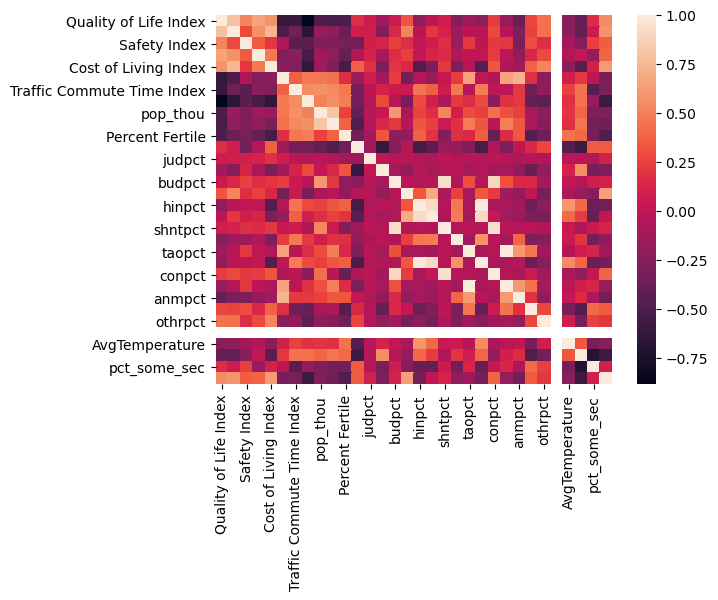

In [9]:
sns.heatmap(main_df.corr())
plt.show()

Looking at the sumpct column it is all 0, so it is not useful

In [10]:
main_df.sumpct.describe()

count    81.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: sumpct, dtype: float64

In [13]:
drop_features = []
drop_features.append('sumpct')

<h1>Exploratory Data Analysis (Removing Correlated Features)</h1>

K:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
K:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
K:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


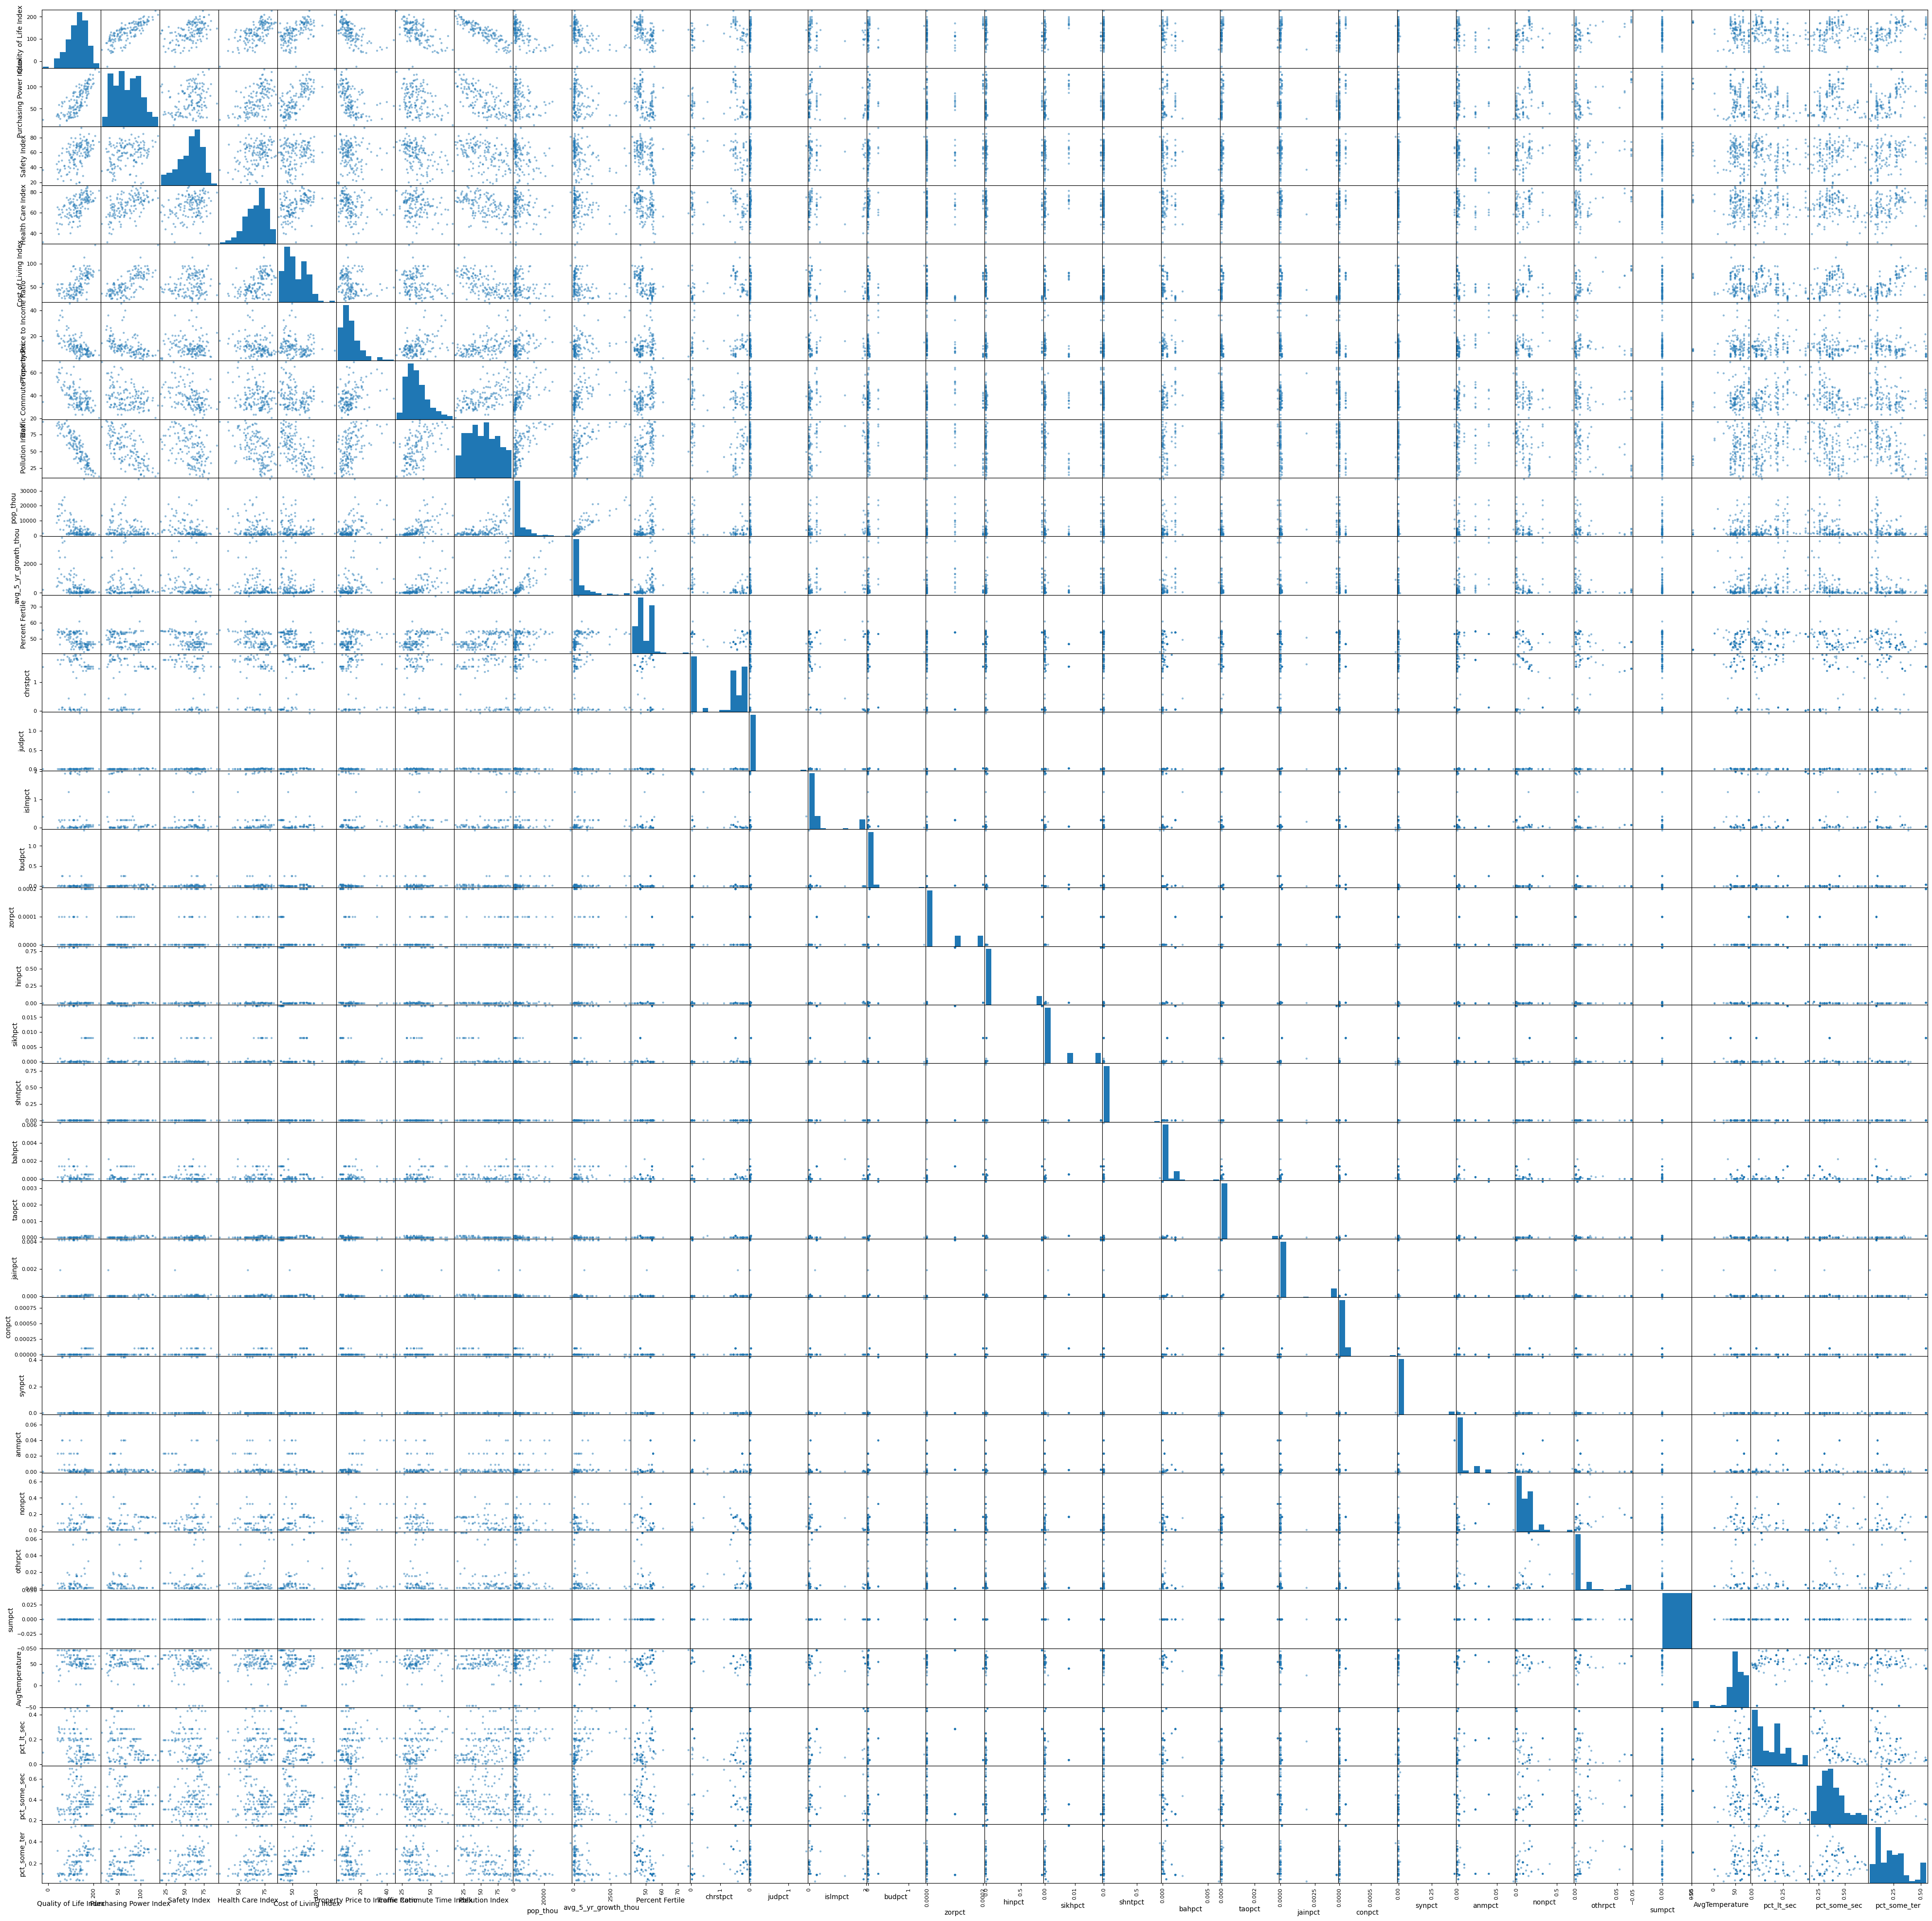

In [14]:
axes = scatter_matrix(main_df,figsize = (50,50));
plt.show()

Looks like a few of the features are correlated heavily with QOL. Lets look at those features

In [15]:
correlated_features = set()
correlation_matrix = main_df.corr()
for j in range(len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[0, j]) > 0.8:
        colname = correlation_matrix.columns[j]
        correlated_features.add(colname)

In [16]:
correlated_features.add(correlation_matrix.columns[0])
main_df[correlated_features].corr()

Quality of Life Index  Pollution Index
Quality of Life Index               1.000000        -0.885149
Pollution Index                    -0.885149         1.000000

The "Pollution Index" and "Purchasing Power Index" features can be dropped without losing too much information

In [17]:
drop_features.extend(['Purchasing Power Index','Pollution Index'])

Many of the religions are also correlated

In [18]:
religion_features = [x for x in main_df.columns if x.find('pct') != -1 and x.find('_') == -1]
correlated_features = list()
correlation_matrix = main_df[religion_features].corr()
for i in range(len(correlation_matrix)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[j]
            colname2 = correlation_matrix.columns[i]
            correlated_features.append([colname,colname2,correlation_matrix.iloc[i, j]])

In [19]:
correlated_features

[['hinpct', 'sikhpct', 0.9147329544430551],
 ['budpct', 'shntpct', 0.940322683570106],
 ['hinpct', 'jainpct', 0.9888807177573188],
 ['sikhpct', 'jainpct', 0.9104790956699536],
 ['budpct', 'conpct', 0.9025301190027071],
 ['shntpct', 'conpct', 0.9438264542749245],
 ['taopct', 'synpct', 0.9987891839623962]]

It looks look percent hindoism is correlated with sikhism and jainism. This makes sense since most of these religions are allpopular in asian countries. Similarly, buddism is correlated with shintoism and conpct.

In [20]:
drop_features.extend(['sikhpct','jainpct','conpct','shntpct','synpct'])

Now lets look at correlation one more time:

In [21]:
correlated_features = list()
correlation_matrix = main_df[[x for x in main_df.columns if x not in religion_features and x not in drop_features]].corr()
for i in range(len(correlation_matrix)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[j]
            colname2 = correlation_matrix.columns[i]
            print('Feature 1: ' + colname + ', Feature 2: ' + colname2)
            print('Correlation Coeffcient =',round(correlation_matrix.iloc[i, j],4))
            print()

Feature 1: pop_thou, Feature 2: avg_5_yr_growth_thou
Correlation Coeffcient = 0.8091



It looks like the only correlation left is between a feature and what we are trying to predict.

Before doing any more feature analysis it will be useful to convert average population growth into percentage population growth.

In [22]:
main_df['avg_5_yr_pct_growth'] = main_df['avg_5_yr_growth_thou']/main_df['pop_thou']
drop_features.append('avg_5_yr_growth_thou')

<h1>Filling N/A Values</h1>

In [23]:
def get_country_codes(df,lbl):
    list_alpha_3 = [i.alpha_3 for i in list(pyc.countries)]
    list_country = [i.name for i in list(pyc.countries)]
    codes = []
    for cntr in list(df[lbl]):
        for idx in range(len(list_country)):
            if fuzz.ratio(cntr.strip().lower(),list_country[idx].lower())>90:
                code = list_alpha_3[idx]
                break
            else:
                code = pd.NA
        codes.append(code)
    return codes

In [24]:
cities_to_fill_in =(main_df[main_df['Country Code'].isna()]['City_x']).values
print(cities_to_fill_in)

['Brno' 'Seoul' 'Tehran']


In [25]:
countries_to_fill_in = ['Czechia','Korea, Republic of', 'Iran, Islamic Republic of']
for i,city in enumerate(cities_to_fill_in):
    main_df.loc[main_df['City_x'] == city, 'Country'] = countries_to_fill_in[i]

In [26]:
main_df.loc[main_df['Country Code'].isna(),'Country Code'] = get_country_codes(main_df[main_df['Country Code'].isna()],'Country')

In [27]:
cities_to_fill_in =(main_df[main_df['Country Code'].isna()]['City_x']).values
print(cities_to_fill_in)

[]


In [28]:
main_df.loc[main_df['Country Code'].isna(),'Country']

Series([], Name: Country, dtype: object)

In [29]:
for col in main_df.columns:
    if main_df[col].isnull().nunique()>1:
        print(main_df[col].isnull().value_counts())
        print()

False    141
True       3
Name: Percent Fertile, dtype: int64

False    81
True     63
Name: chrstpct, dtype: int64

False    81
True     63
Name: judpct, dtype: int64

False    81
True     63
Name: islmpct, dtype: int64

False    81
True     63
Name: budpct, dtype: int64

False    81
True     63
Name: zorpct, dtype: int64

False    81
True     63
Name: hinpct, dtype: int64

False    81
True     63
Name: sikhpct, dtype: int64

False    81
True     63
Name: shntpct, dtype: int64

False    81
True     63
Name: bahpct, dtype: int64

False    81
True     63
Name: taopct, dtype: int64

False    81
True     63
Name: jainpct, dtype: int64

False    81
True     63
Name: conpct, dtype: int64

False    81
True     63
Name: synpct, dtype: int64

False    81
True     63
Name: anmpct, dtype: int64

False    81
True     63
Name: nonpct, dtype: int64

False    81
True     63
Name: othrpct, dtype: int64

False    81
True     63
Name: sumpct, dtype: int64

False    131
True      13
Name: Country, dtype

There are many countries with only 1 or 2 cities in it, so it might be useful to categorize them by continent in the case that there happens to be a difference between regions.

In [30]:
def country_code_to_continent(code):
    return pc.country_alpha2_to_continent_code(pc.country_alpha3_to_country_alpha2(code))

In [31]:
main_df['Continent'] = main_df['Country Code'].apply(lambda x: country_code_to_continent(x))

In [32]:
def apply_median(df,group_by_feature,median_feature):
    median_df = df.groupby(group_by_feature)[median_feature].median()
    feature_df = df[median_feature]
    indicies = list(median_df.index)
    feature_median = []
    feature_index = []
    for index in indicies:
        median = median_df.loc[index]
        df2 = df[group_by_feature] == index
        df2 = df2 & feature_df.isna()
        if len(df2[df2])>0:
            feature_index.append(df2)
            feature_median.append(median)
    return feature_median, feature_index

In [33]:
for religion in religion_features:
    f_m, f_idx = apply_median(main_df,'Country Code',religion)
    for i,x in enumerate(f_idx):
        main_df.loc[x,religion] = f_m[i]

In [34]:
for religion in religion_features:
    f_m, f_idx = apply_median(main_df,'Continent',religion)
    for i,x in enumerate(f_idx):
        main_df.loc[x,religion] = f_m[i]

In [35]:
feature = 'Percent Fertile'
country_median_df = main_df.groupby('Country Code')[feature].median()
f_m, f_idx = apply_median(main_df,'Country Code',feature)
for i,x in enumerate(f_idx):
    main_df.loc[x, feature] = f_m[i]

In [36]:
features = ['AvgTemperature', 'Percent Fertile','pct_lt_sec','pct_some_sec','pct_some_ter']
for feature in features:
    f_m, f_idx = apply_median(main_df,'Country Code',feature)
    for i,x in enumerate(f_idx):
        main_df.loc[x,feature] = f_m[i]

In [37]:
features = ['AvgTemperature', 'Percent Fertile','pct_lt_sec','pct_some_sec','pct_some_ter']
for feature in features:
    f_m, f_idx = apply_median(main_df,'Continent',feature)
    for i,x in enumerate(f_idx):
        main_df.loc[x,feature] = f_m[i]

In [38]:
for col in main_df.columns:
    if main_df[col].isnull().nunique()>1:
        print(main_df[col].isnull().value_counts())
        print()

False    131
True      13
Name: Country, dtype: int64

False    131
True      13
Name: City_y, dtype: int64



<h1> Encoding <h1>

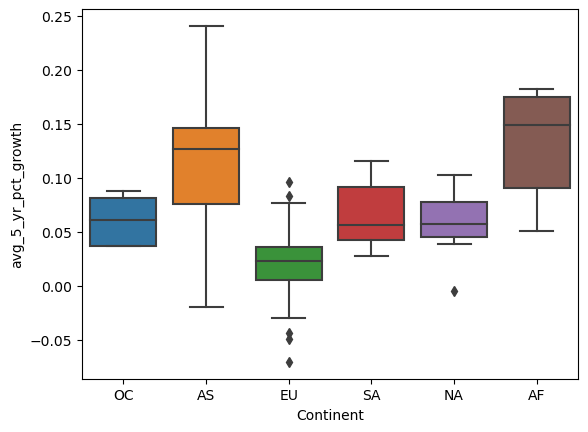

In [39]:
sns.boxplot(data = main_df, x = 'Continent', y = 'avg_5_yr_pct_growth')
plt.show()

It seems as though there is a large variation in mean growth dependent on the continent.

It will be helpful to one-hot encode these.

In [40]:
continent_list = list(main_df['Continent'].unique())
for continent in continent_list:
    main_df[continent] = (main_df['Continent'] == continent).astype(int)

At this point we no longer need the city columns, since that does not really give us any generalizable information.

In [41]:
drop_features.extend(['City_x','City_y'])

Most of the religions are more categorical or nearly constant. Thus it is best to drop the nearly constant ones and classify the rest.

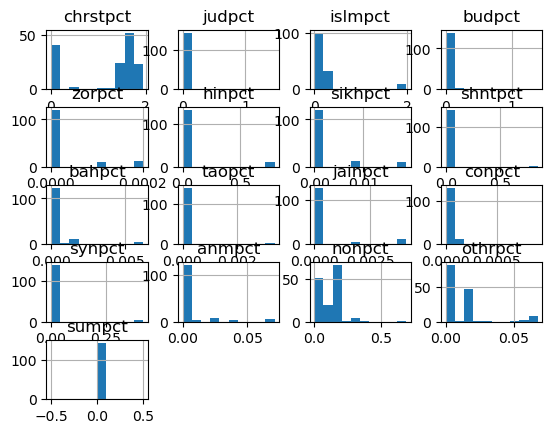

In [42]:
main_df[religion_features].hist()
plt.show()

In [43]:
for col in religion_features:
    main_df[col] = (main_df[col]>main_df[col].mean()).astype(int)

In [44]:
for col in religion_features:
    if (main_df[col].value_counts().min()/main_df[col].count())<.1:
        drop_features.append(col)

<h1> EDA with simple Linear Regression </h1>

lets look at 'Quality of Life Index','Safety Index','Health Care Index','Cost of Living Index','Property Price to Income Ratio', and 'Traffic Commute Time Index' and see if there is any kind of relationship to the 'avg_5_yr_pct_growth'.

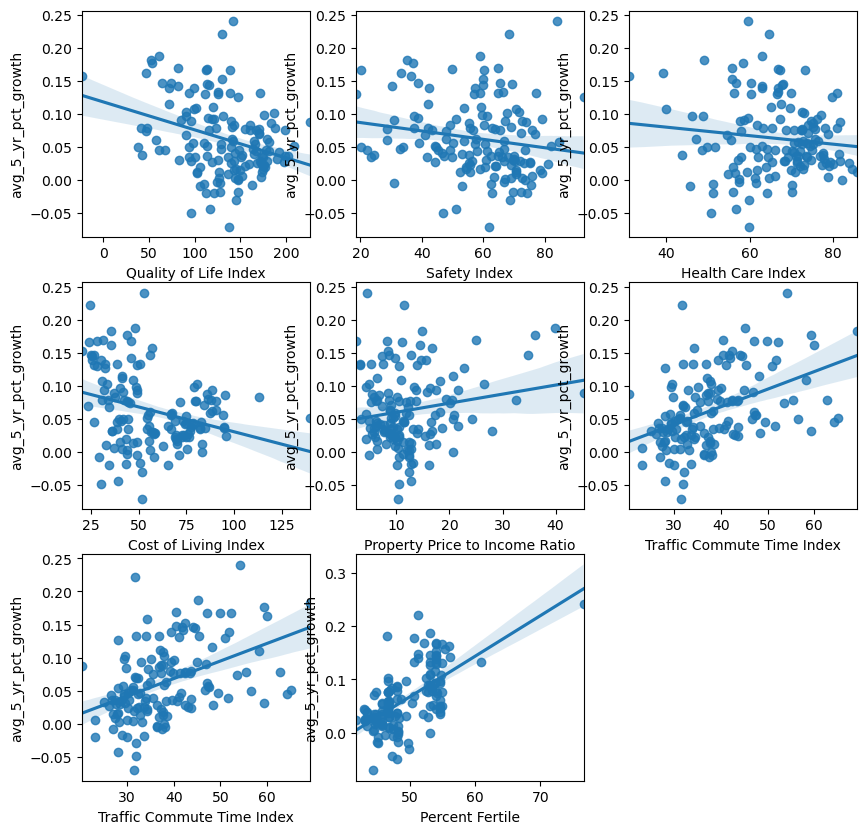

In [45]:
f = plt.figure(figsize = (10,10))
feature_list = ['Quality of Life Index','Safety Index','Health Care Index','Cost of Living Index','Property Price to Income Ratio','Traffic Commute Time Index']
i = 1
for feature in feature_list:
    sns.regplot(data = main_df, x = feature, y = 'avg_5_yr_pct_growth', ax = plt.subplot(3,3,i))
    i+=1
sns.regplot(data = main_df, x = 'Traffic Commute Time Index', y = 'avg_5_yr_pct_growth', ax = plt.subplot(3,3,i))
i+=1
sns.regplot(data = main_df, x = 'Percent Fertile', y = 'avg_5_yr_pct_growth', ax = plt.subplot(3,3,i))
plt.show()

In [46]:
main_df[['avg_5_yr_pct_growth'] + feature_list].corr()['avg_5_yr_pct_growth']

avg_5_yr_pct_growth               1.000000
Quality of Life Index            -0.318339
Safety Index                     -0.172543
Health Care Index                -0.117437
Cost of Living Index             -0.292357
Property Price to Income Ratio    0.172111
Traffic Commute Time Index        0.445456
Name: avg_5_yr_pct_growth, dtype: float64

The continent regionality captures most of the variation in 'avg_5_yr_pct_growth'.

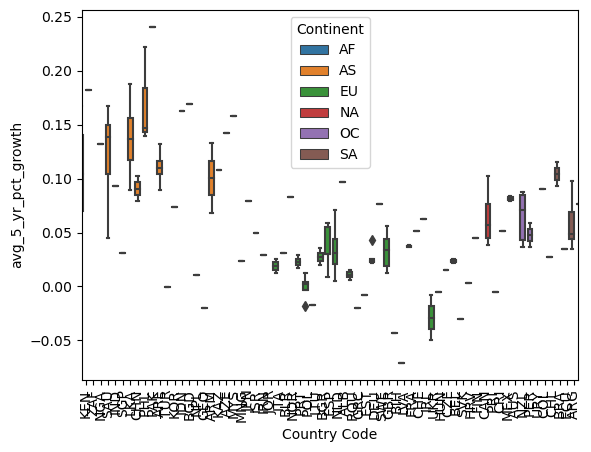

In [47]:
ax = sns.boxplot(data = main_df.sort_values('Continent'), x = 'Country Code', y = 'avg_5_yr_pct_growth', hue = 'Continent',width=4)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [48]:
drop_features.append('Country Code')

In [49]:
main_df[['avg_5_yr_pct_growth','pop_thou']].corr()

avg_5_yr_pct_growth  pop_thou
avg_5_yr_pct_growth             1.000000  0.336512
pop_thou                        0.336512  1.000000

<h1> Untouched Data</h1>

The 'pct_some_sec' and 'pct_lt_sec' data seem to be in good shape already without alteration.

In [50]:
main_df[['avg_5_yr_pct_growth','pct_some_sec','pct_lt_sec','pct_some_ter']].corr()

avg_5_yr_pct_growth  pct_some_sec  pct_lt_sec  \
avg_5_yr_pct_growth             1.000000     -0.473495    0.477762   
pct_some_sec                   -0.473495      1.000000   -0.714075   
pct_lt_sec                      0.477762     -0.714075    1.000000   
pct_some_ter                   -0.298502      0.116092   -0.584870   

                     pct_some_ter  
avg_5_yr_pct_growth     -0.298502  
pct_some_sec             0.116092  
pct_lt_sec              -0.584870  
pct_some_ter             1.000000

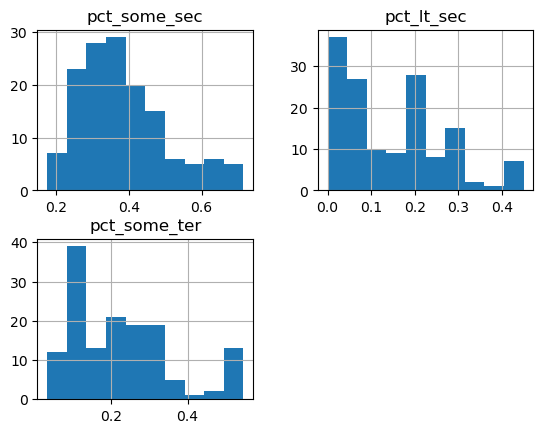

In [51]:
main_df[['pct_some_sec','pct_lt_sec','pct_some_ter']].hist()
plt.show()

In [52]:
drop_features.append('Continent')
drop_features.append('State')
main_df.drop(columns = set(drop_features), inplace = True)

In [53]:
main_df.head()

Quality of Life Index  Safety Index  Health Care Index  \
0             199.101765     64.796471          71.123529   
1             113.272143     69.215714          68.046429   
2              90.724167     41.099167          54.720000   
3              96.460625     56.303750          68.582500   
4             174.905714     66.098571          69.252143   

   Cost of Living Index  Property Price to Income Ratio  \
0             84.723529                        5.124118   
1             26.800714                        8.554286   
2             34.263333                       12.137500   
3             58.330000                        8.578750   
4             82.354286                       10.192857   

   Traffic Commute Time Index  pop_thou  Percent Fertile  chrstpct  judpct  \
0                   27.401176    1265.0        47.940359         1       0   
1                   41.815714    7335.0        53.945344         0       0   
2                   32.410000    1503.0        50.655816         0       0   
3                   48.328125    1142.0        52.759533         0       0   
4                   28.742857    1096.0        44.442243         1       0   

   ...  pct_lt_sec  pct_some_sec  pct_some_ter  avg_5_yr_pct_growth  OC  AS  \
0  ...       0.075         0.440         0.330             0.036364   1   0   
1  ...       0.285         0.260         0.095             0.146012   0   1   
2  ...       0.020         0.600         0.265             0.068530   0   1   
3  ...       0.125         0.290         0.265             0.028897   0   1   
4  ...       0.085         0.405         0.270             0.034672   0   0   

   EU SA  NA  AF  
0   0  0   0   0  
1   0  0   0   0  
2   0  0   0   0  
3   0  0   0   0  
4   1  0   0   0  

[5 rows x 29 columns]